In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline
import json
import pickle
from pprint import pprint
import matplotlib

from guacamol.standard_benchmarks import *

from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw, PandasTools
from rdkit.Chem.Draw import IPythonConsole

import seaborn as sns
from mpl_toolkits import mplot3d
# import plotly.express as px
sns.set_style("whitegrid")

RDKit WARNING: [10:30:50] Enabling RDKit 2019.09.2 jupyter extensions
Using TensorFlow backend.


In [57]:
# def read_smiles(path_to_file):
#     data = []
#     with open(path_to_file, 'r') as f:
#         lines = f.readlines()
#     for line in lines:
#         try:
#             mol = Chem.MolFromSmiles(line.strip())
#             smiles = Chem.MolToSmiles(mol)
#         except:
#             smiles = line.strip()
#         data.append(smiles)
#     return pd.DataFrame({
#         'SMILES': data
#     })

# guacamol = read_smiles('data/guacamol_v1_all.smiles')

In [58]:
# moses = read_smiles('data/moses.smiles')

In [100]:
# guacamol.to_csv('data/guacamol_v1_all.csv', index=False)
# moses.to_csv('data/moses.csv', index=False)

guacamol = pd.read_csv('data/guacamol_v1_all.csv')
moses = pd.read_csv('data/moses.csv')

# Trivial Goals

In [4]:
df_trivial_cwo = pd.read_csv('./data/chembl_wo.csv')
df_trivial_cwa = pd.read_csv('./data/chembl_wa.csv')
df_trivial_cwc = pd.read_csv('./data/chembl_wc.csv')

df_trivial_mwo = pd.read_csv('./data/moses_wo.csv')
df_trivial_mwa = pd.read_csv('./data/moses_wa.csv')
df_trivial_mwc = pd.read_csv('./data/moses_wc.csv')

In [136]:
df = df_trivial_mwc
df[df['method'] == 'graph_ga'][df['property'] == 'CNS MPO']

,SMILES,tb_synthesizability,tb_depth,tb_plausibility,tb_price,property,len_smiles,dataset,type,method,rank,objective
700,O=S(=O)(c1ccccc1)N(Cc1ccccc1)c1ccccn1,1,1,0.999967,2.0,CNS MPO,37,moses,wc,graph_ga,1,1.0
701,O=C1c2ccccc2S(=O)(=O)N1c1c(F)c(F)nc(F)c1F,1,3,0.990491,39.0,CNS MPO,41,moses,wc,graph_ga,2,1.0
702,O=C1OC(C2OC(=O)c3ccccc32)c2ccccc21,1,6,0.249778,5.0,CNS MPO,34,moses,wc,graph_ga,3,1.0
703,O=C1CCCN1S(=O)(=O)c1ccc(Cl)cc1,1,1,0.936473,85.0,CNS MPO,30,moses,wc,graph_ga,4,1.0
704,O=C(c1ccccn1)N1CCN(C(=O)c2ccccn2)CC1,1,3,0.989674,13.0,CNS MPO,36,moses,wc,graph_ga,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,CC(=O)Oc1ccccc1C(=O)N1CC(C)OC(C)C1,1,1,0.999793,8.0,CNS MPO,34,moses,wc,graph_ga,96,1.0
796,CC(=O)Oc1cccc(OC(C)=O)c1OC(C)=O,1,1,0.999882,2.0,CNS MPO,31,moses,wc,graph_ga,97,1.0
797,CC(=O)Oc1cc(C)c(OC(C)=O)c2ccccc12,1,0,1.000000,3.0,CNS MPO,33,moses,wc,graph_ga,98,1.0
798,C=CCN(CC=C)S(=O)(=O)c1ccc(OC)cc1,1,1,0.999432,16.0,CNS MPO,32,moses,wc,graph_ga,99,1.0


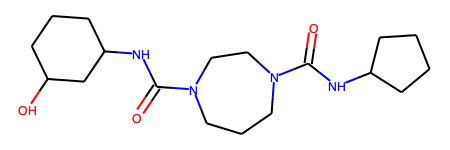

In [132]:
s = '\
O=C(NC1CCCC1)N1CCCN(C(=O)NC2CCCC(O)C2)CC1 \
'

Chem.MolFromSmiles(s)

In [133]:
obj = pioglitazone_mpo()
obj.objective.score(s)

0.966777794191368

In [134]:
Chem.MolToSmiles(Chem.MolFromSmiles(s)) in list(guacamol.SMILES)

False

In [135]:
Chem.MolToSmiles(Chem.MolFromSmiles(s)) in list(moses.SMILES)

False

# Hard Goals

In [137]:
df_hard_cwo = pd.read_csv('./data/goal_hard_cwo.csv')
df_hard_cwa = pd.read_csv('./data/goal_hard_cwa.csv')
df_hard_cwc = pd.read_csv('./data/goal_hard_cwc.csv')

df_hard_mwo = pd.read_csv('./data/goal_hard_mwo.csv')
df_hard_mwa = pd.read_csv('./data/goal_hard_mwa.csv')
df_hard_mwc = pd.read_csv('./data/goal_hard_mwc.csv')

In [1258]:
df = df_hard_cwo
len(df)

3939

In [1259]:
q = 0
# q += 100
# q -= 48
df[q:]

,SMILES,tb_synthesizability,tb_depth,tb_plausibility,tb_price,property,len_smiles,method,rank,objective,dataset,type
0,CC(=O)N(C)c1cccc(-c2ccnc3c(C(=O)c4cccs4)cnn23)c1,1,6,0.866195,101.0,Zaleplon MPO,48,best_from_chembl,1,0.585056,chembl,wo
1,CC(=O)N(Cc1c(C#N)c2ccccc2n1C)c1ccccc1,1,3,0.964585,43.0,Zaleplon MPO,37,best_from_chembl,2,0.559063,chembl,wo
2,CCN(C(=O)c1cnc2ccc(C)cn2c1=O)c1ccccc1,1,1,0.999943,91.0,Zaleplon MPO,37,best_from_chembl,3,0.547933,chembl,wo
3,Cc1cc(Nc2nccc(C)n2)cc(-c2cccc(C(=O)O)c2)c1,1,3,0.999408,27.0,Zaleplon MPO,42,best_from_chembl,4,0.539687,chembl,wo
4,COc1cccc(-c2ccnc(C(=O)Nc3cccc(C)n3)c2)c1,1,2,0.998562,10.0,Zaleplon MPO,40,best_from_chembl,5,0.537086,chembl,wo
...,...,...,...,...,...,...,...,...,...,...,...,...
3934,CN1CCN(c2cc(N(C)C)c(Nc3nccc(C(N)=O)n3)cc2NC(=O...,1,7,0.998583,144.0,Osimertinib MPO,75,graph_ga,96,0.930605,chembl,wo
3935,CN1CCN(c2cc(N(C)C)c(Nc3nccc(N)n3)cc2NC(=O)Cn2c...,1,7,0.939388,122.0,Osimertinib MPO,70,graph_ga,97,0.930428,chembl,wo
3936,COc1cc(N2CCN(C)CC2)c(NC(=O)COn2c(=O)c3ccccc3n(...,0,11,0.000000,-1.0,Osimertinib MPO,68,graph_ga,98,0.930352,chembl,wo
3937,COc1cc(N2CCN(C)CC2)c(NC(=O)NC(=O)C(O)n2c(=O)c3...,0,11,0.000000,-1.0,Osimertinib MPO,76,graph_ga,99,0.930058,chembl,wo


In [1261]:
df[df['method'] == 'graph_ga'][df['property'] == 'Perindopril MPO']

,SMILES,tb_synthesizability,tb_depth,tb_plausibility,tb_price,property,len_smiles,method,rank,objective,dataset,type
3039,CCOC(=O)C(CCc1n[nH][nH]1)NC(C)C(=O)N1C(C(=O)c2...,0,11,0.0,-1.0,Perindopril MPO,67,graph_ga,1,0.784960,chembl,wo
3040,CCOC(=O)C(CCc1n[nH][nH]1)NC(C)C(=O)N1C(C(=O)c2...,0,11,0.0,-1.0,Perindopril MPO,67,graph_ga,2,0.784960,chembl,wo
3041,CCOC(=O)C(CCc1c[nH][nH]1)NC(C)C(=O)N1C(C(=O)c2...,0,11,0.0,-1.0,Perindopril MPO,67,graph_ga,3,0.784960,chembl,wo
3042,CCOC(=O)C(CCc1c[nH][nH]1)NC(C)C(=O)N1C(C(=O)c2...,0,11,0.0,-1.0,Perindopril MPO,67,graph_ga,4,0.784960,chembl,wo
3043,CCOC(=O)C(CCc1n[nH][nH]1)NC(C)C(=O)N1C(C(=O)c2...,0,11,0.0,-1.0,Perindopril MPO,68,graph_ga,5,0.783493,chembl,wo
...,...,...,...,...,...,...,...,...,...,...,...,...
3134,CCOC(=O)C(CCc1c[nH][nH]1)NC(C)C(=O)N1C(C(=O)c2...,0,11,0.0,-1.0,Perindopril MPO,65,graph_ga,96,0.769567,chembl,wo
3135,CCOC(=O)C(CCc1c[nH][nH]1)NC(C)C(=O)N1C(C(=O)c2...,0,11,0.0,-1.0,Perindopril MPO,65,graph_ga,97,0.769567,chembl,wo
3136,CCOC(=O)C(CCc1c[nH][nH]1)NC(C)C(=O)N1C(C(=O)c2...,0,11,0.0,-1.0,Perindopril MPO,65,graph_ga,98,0.769567,chembl,wo
3137,CCOC(=O)C(CCc1c[nH][nH]1)NC(C)C(=O)N1C(C(=O)c2...,0,11,0.0,-1.0,Perindopril MPO,65,graph_ga,99,0.769567,chembl,wo


In [1249]:
w = 3999
# w += 100
# w -= 35
s = df.SMILES[w]
s

'COc1cc2c(Nc3ncnc4cc(Br)c(OCc5ccccc5)cc34)ncnc2cc1OOBr'

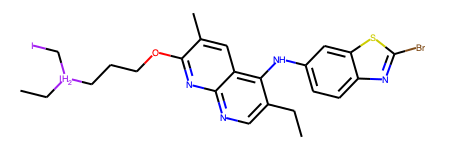

In [1268]:
s = \
'CCc1cnc2nc(OCCC[IH2](CC)CI)c(C)cc2c1Nc1ccc2nc(Br)sc2c1'

Chem.MolFromSmiles(s)

In [1269]:
obj = decoration_hop()
obj.objective.score(s)

0.8850625459896984

In [1266]:
Chem.MolToSmiles(Chem.MolFromSmiles(s)) in list(guacamol.SMILES)

False

In [1267]:
Chem.MolToSmiles(Chem.MolFromSmiles(s)) in list(moses.SMILES)

False